In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-dataset/lingSpam.csv
/kaggle/input/email-spam-dataset/enronSpamSubset.csv
/kaggle/input/email-spam-dataset/completeSpamAssassin.csv
/kaggle/input/multilingual-spam-data/data-en-hi-de-fr.csv


In [60]:
df= pd.read_csv('../input/multilingual-spam-data/data-en-hi-de-fr.csv')


In [61]:
df.columns

Index(['labels', 'text', 'text_hi', 'text_de', 'text_fr'], dtype='object')

In [62]:
df.drop(columns = ['text', 'text_hi', 'text_de'], inplace =True)
df.head()

,labels,text_fr
0,ham,"Allez jusqu'à Jurong point, fou.. Disponible s..."
1,ham,J'ai fait une blague sur le wif u oni...
2,spam,Entrée libre dans 2 a wkly comp pour gagner FA...
3,ham,U dun dit si tôt hor... U c déjà dire alors...
4,ham,"Non, je ne pense pas qu'il va à usf, il vit da..."


In [63]:
df["labels"].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [66]:
from imblearn.over_sampling import RandomOverSampler

X, y = RandomOverSampler().fit_resample(df[["text_fr"]], df[["labels"]])

In [67]:
df["labels"].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [45]:
df.labels.value_counts(normalize = True)

ham     0.865937
spam    0.134063
Name: labels, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='labels', ylabel='count'>

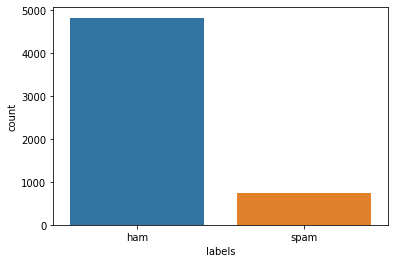

In [46]:
sns.countplot(df.labels)

In [48]:
from imblearn.over_sampling import RandomOverSampler

X, y = RandomOverSampler().fit_resample(df[["text_fr"]], df[["labels"]])
sns.countplot(df.labels)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='labels', ylabel='count'>

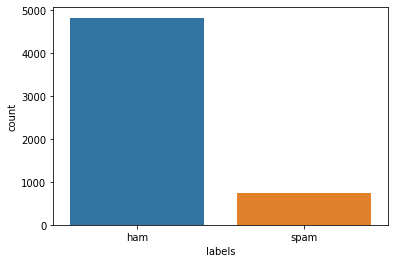

In [49]:
sns.countplot(df.labels)

In [47]:
df.head()

,labels,text_fr
0,ham,"Allez jusqu'à Jurong point, fou.. Disponible s..."
1,ham,J'ai fait une blague sur le wif u oni...
2,spam,Entrée libre dans 2 a wkly comp pour gagner FA...
3,ham,U dun dit si tôt hor... U c déjà dire alors...
4,ham,"Non, je ne pense pas qu'il va à usf, il vit da..."


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='labels', ylabel='count'>

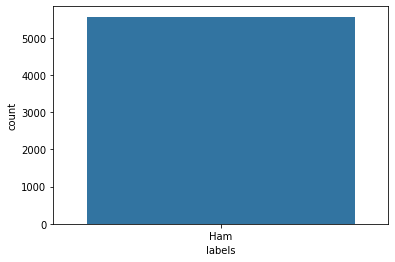

In [16]:
sns.countplot(df.labels)

In [17]:
df.columns

Index(['labels', 'text_fr'], dtype='object')

In [18]:
X = df['text_fr']
y = df['labels']

In [39]:
df.labels.value_counts(normalize = True)

Ham    1.0
Name: labels, dtype: float64

In [38]:
from imblearn.over_sampling import RandomOverSampler

X, y = RandomOverSampler().fit_resample(df[["text_fr"]], df[["labels"]])

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.20,
                                                random_state=105,
                                                )

In [29]:
vecto = TfidfVectorizer()
train_vecto = vecto.fit_transform(X_train.values.astype('U'))
test_vecto = vecto.transform(X_test.values.astype('U'))

In [30]:
train_vecto.shape,test_vecto.shape

((4457, 8743), (1115, 8743))

In [31]:
nav = MultinomialNB()
nav.fit(train_vecto,y_train)
pred = nav.predict(test_vecto)

In [32]:
confusion_matrix(y_test,pred)

array([[1115]])

In [33]:
print(accuracy_score(y_test,pred))

1.0


In [25]:
def test_spam_ham(text):
    text = vecto.transform(text)
    predict = nav.predict(text)
    if predict==0:
        print('not spam')
    else:
        print('spam')

In [26]:
message = ['More companies than ever are adopting AI. But there’s a big difference between pilot projects and production. And there are a lot of use cases and tools available. This free report will fill you in on where AI is growing, the tools developers are using to get projects into production, and more. Find out who’s using AI successfully—and how your company compares. Free']

In [27]:
print(test_spam_ham(message))

spam
None


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
